## Cargar los datos



In [1]:
import pandas as pd

df = pd.read_csv('/content/diabetes.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Seleccionar variables


In [2]:
df_selected_vars = df[['Pregnancies', 'Glucose', 'BloodPressure']]
display(df_selected_vars.head())

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


## Análisis exploratorio inicial



In [3]:
display(df_selected_vars.head())
df_selected_vars.info()
display(df_selected_vars.describe())

,Pregnancies,Glucose,BloodPressure
0,6,148,72
1,1,85,66
2,8,183,64
3,1,89,66
4,0,137,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
dtypes: int64(3)
memory usage: 18.1 KB


,Pregnancies,Glucose,BloodPressure
count,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469
std,3.369578,31.972618,19.355807
min,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000
50%,3.000000,117.000000,72.000000
75%,6.000000,140.250000,80.000000
max,17.000000,199.000000,122.000000


## Visualización



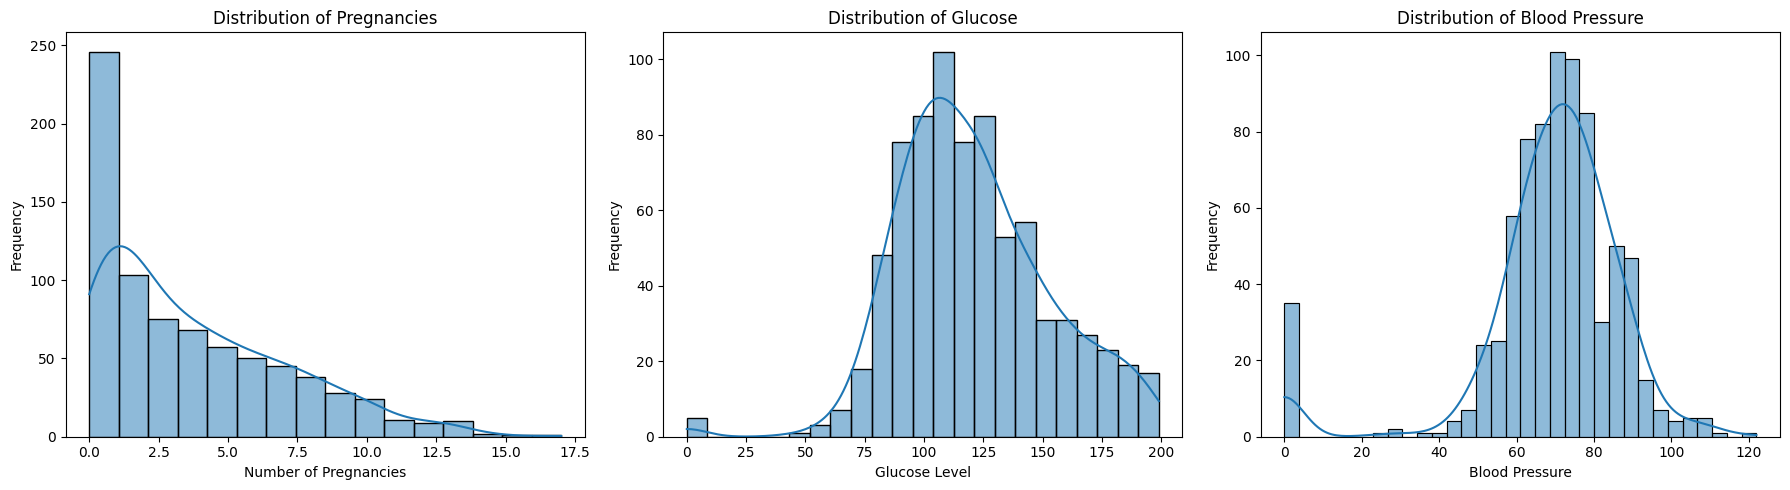

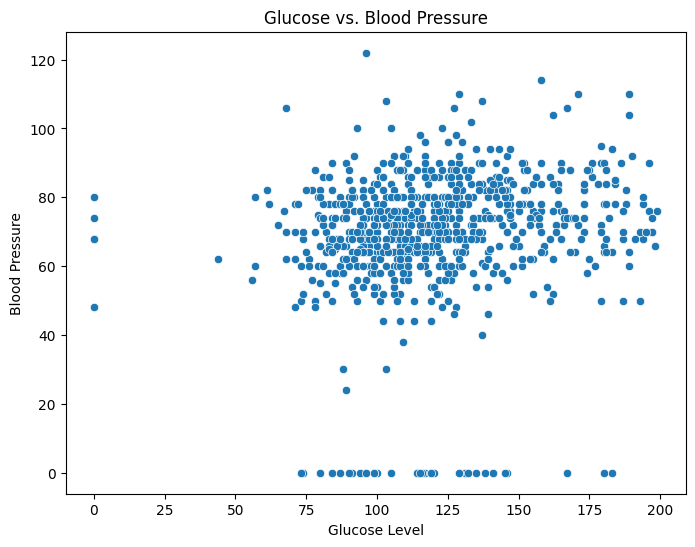

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df_selected_vars, x='Pregnancies', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Pregnancies')
axes[0].set_xlabel('Number of Pregnancies')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df_selected_vars, x='Glucose', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Glucose')
axes[1].set_xlabel('Glucose Level')
axes[1].set_ylabel('Frequency')

sns.histplot(data=df_selected_vars, x='BloodPressure', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Blood Pressure')
axes[2].set_xlabel('Blood Pressure')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected_vars, x='Glucose', y='BloodPressure')
plt.title('Glucose vs. Blood Pressure')
plt.xlabel('Glucose Level')
plt.ylabel('Blood Pressure')
plt.show()

## Explicación de los Histogramas



*   **Histograma de Pregnancies:** Este gráfico muestra la distribución del número de embarazos reportados. Podemos observar cómo se agrupan los datos y si hay algún patrón o valores inusualmente altos o bajos.
*   **Histograma de Glucose:** Este histograma ilustra la distribución de los niveles de glucosa. Es útil para ver el rango típico de los niveles de glucosa en este conjunto de datos y si hay concentraciones en ciertos rangos.
*   **Histograma de Blood Pressure:** Este gráfico presenta la distribución de la presión arterial. Nos ayuda a entender los valores comunes de presión arterial y la dispersión de los datos.

## Análisis Mapas de calor

,Pregnancies,Glucose,BloodPressure
Pregnancies,1.000000,0.129459,0.141282
Glucose,0.129459,1.000000,0.152590
BloodPressure,0.141282,0.152590,1.000000


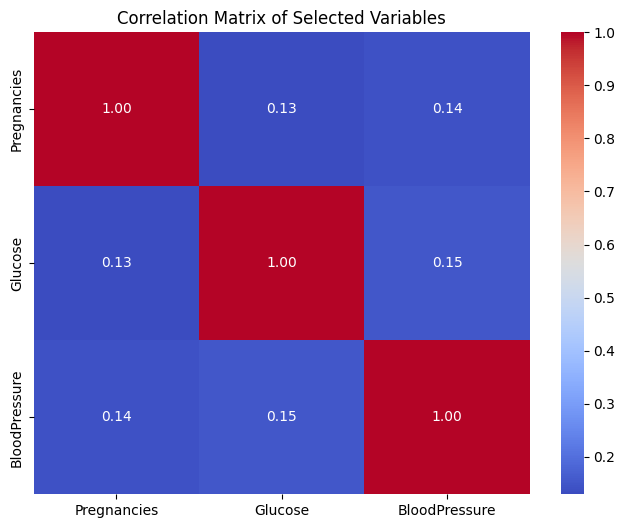

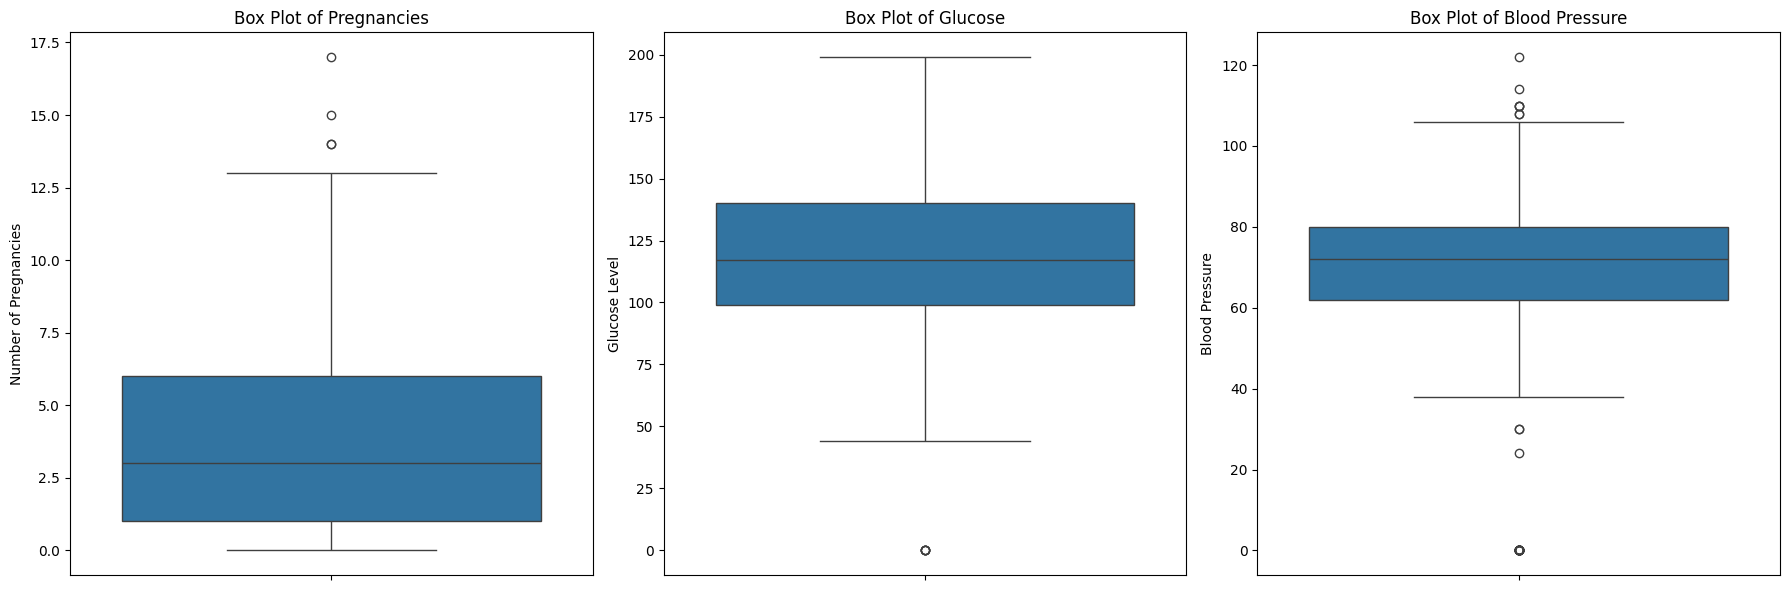

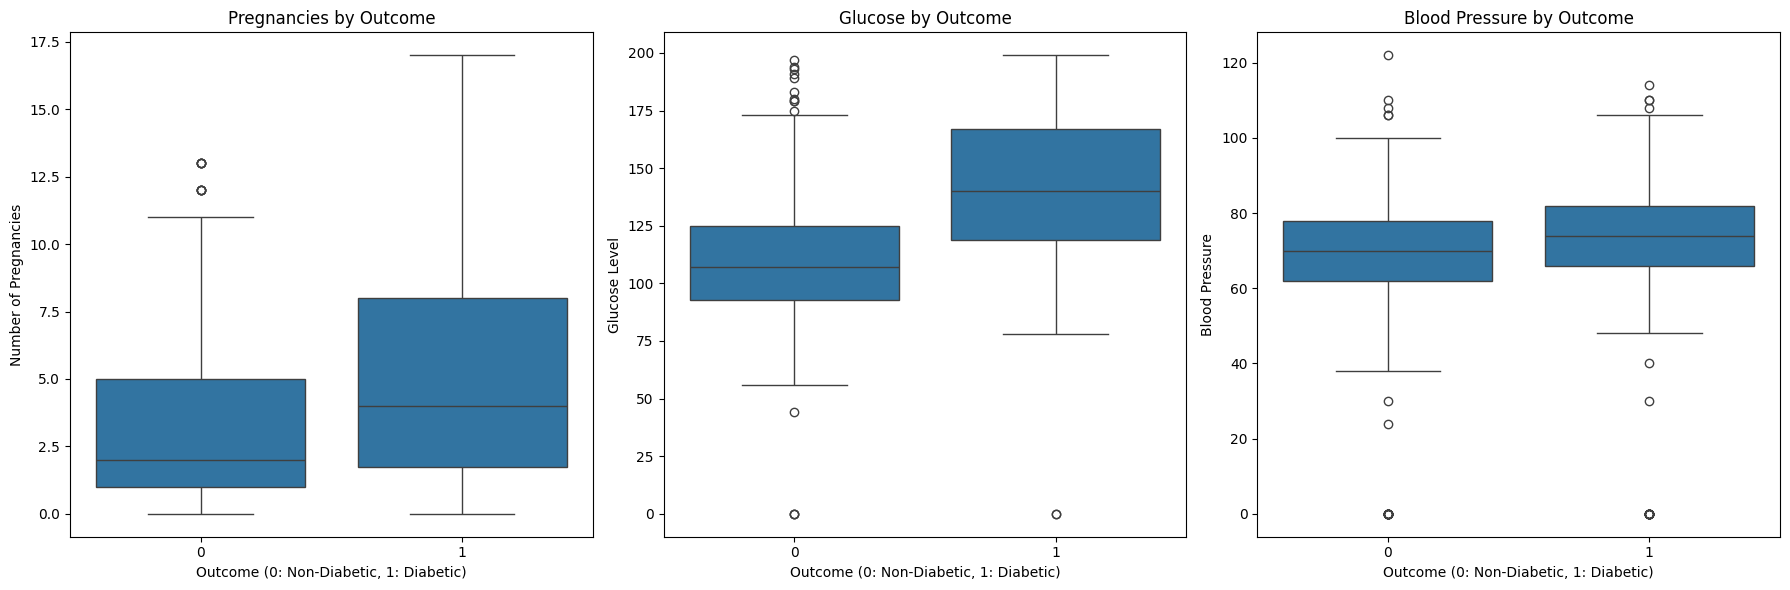

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_selected_vars.corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Variables')
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df_selected_vars['Pregnancies'], ax=axes[0])
axes[0].set_title('Box Plot of Pregnancies')
axes[0].set_ylabel('Number of Pregnancies')

sns.boxplot(y=df_selected_vars['Glucose'], ax=axes[1])
axes[1].set_title('Box Plot of Glucose')
axes[1].set_ylabel('Glucose Level')

sns.boxplot(y=df_selected_vars['BloodPressure'], ax=axes[2])
axes[2].set_title('Box Plot of Blood Pressure')
axes[2].set_ylabel('Blood Pressure')

plt.tight_layout()
plt.show()

# Add boxplots with outcome
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x=df['Outcome'], y=df['Pregnancies'], ax=axes[0])
axes[0].set_title('Pregnancies by Outcome')
axes[0].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
axes[0].set_ylabel('Number of Pregnancies')

sns.boxplot(x=df['Outcome'], y=df['Glucose'], ax=axes[1])
axes[1].set_title('Glucose by Outcome')
axes[1].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
axes[1].set_ylabel('Glucose Level')

sns.boxplot(x=df['Outcome'], y=df['BloodPressure'], ax=axes[2])
axes[2].set_title('Blood Pressure by Outcome')
axes[2].set_xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
axes[2].set_ylabel('Blood Pressure')

plt.tight_layout()
plt.show()

## Explicación del Mapa de Calor y Box Plots

### Mapa de Calor (Matriz de Correlación)

El mapa de calor muestra la matriz de correlación entre las variables seleccionadas ('Pregnancies', 'Glucose', 'BloodPressure'). Cada celda de la matriz contiene el coeficiente de correlación entre dos variables, indicando la fuerza y dirección de su relación lineal:

*   **Valores cercanos a 1:** Indican una correlación positiva fuerte (cuando una variable aumenta, la otra también tiende a aumentar).
*   **Valores cercanos a -1:** Indican una correlación negativa fuerte (cuando una variable aumenta, la otra tiende a disminuir).
*   **Valores cercanos a 0:** Indican una correlación lineal débil o nula.

En este caso, los valores de correlación entre 'Pregnancies', 'Glucose' y 'BloodPressure' son relativamente bajos, lo que sugiere que no hay una relación lineal fuerte entre estas variables en este conjunto de datos.

### Box Plots

Los box plots (diagramas de caja) nos ayudan a visualizar la distribución de cada variable y a identificar posibles valores atípicos (outliers).

*   **Box Plots Individuales:** Muestran la distribución general de 'Pregnancies', 'Glucose', y 'BloodPressure'. La caja central representa el rango intercuartílico, la línea dentro de la caja es la mediana, y los "bigotes" se extienden a los valores mínimo y máximo dentro de 1.5 veces el IQR desde los cuartiles. Los puntos fuera de los bigotes se consideran posibles valores atípicos.

*   **Box Plots por Outcome:** Estos gráficos comparan la distribución de cada variable ('Pregnancies', 'Glucose', 'BloodPressure') para los dos grupos de 'Outcome'. Esto nos permite observar si hay diferencias notables en la distribución de estas variables entre las personas con y sin diabetes, lo cual puede ser útil para entender qué variables podrían ser predictores importantes de la diabetes. Por ejemplo, si la caja y los bigotes de una variable son consistentemente más altos o más bajos para el grupo con Outcome 1 en comparación con el grupo con Outcome 0, sugiere que esa variable está relacionada con la diabetes.

##Grafico de barras Outcome


## Gráfico de Barras de Outcome



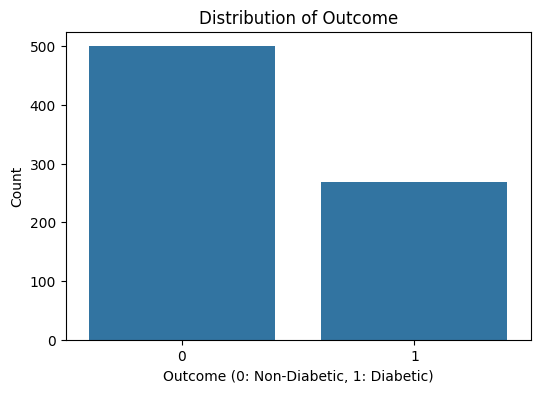

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Outcome')
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Count')
plt.show()

Este gráfico de barras muestra la distribución de la variable 'Outcome', que indica si un individuo es diabético (1) o no diabético (0). Nos permite ver cuántos individuos hay en cada categoría en el conjunto de datos, lo cual es útil para entender el balance de clases.